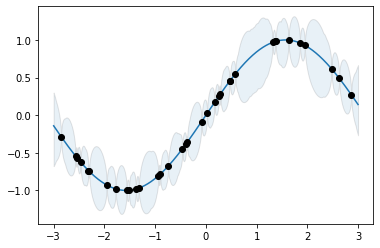

In [2]:
import numpy as np

class GaussianProcess(object):
    ''' A simple Gaussian Process model. '''

    def __init__(self, x, y):

        self.x, self.y = x, y
        assert len(x) == len(y), 'x, y must be of same size!'
        self.N = len(x)
        self.Sigma, self.P = None, None

    def kernel(self, x, y):
        return max(0, 1 - abs(x - y))

    def train(self):
        ''' Returns covariance and precision matrix of the known data under a Gaussian process. '''

        N = len(self.x)
        # Normalize the data (i.e. subtract the mean)
        mean = np.mean(self.x)
        x_normalized = self.x - mean

        # Build the covariance matrix of the known data
        Sigma = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                Sigma[i, j] = self.kernel(x_normalized[i], x_normalized[j])

        # Compute precision matrix
        P = np.linalg.inv(Sigma)

        self.Sigma, self.P = Sigma, P
        return Sigma, P

    def predict(self, p):
        ''' Predict the value an unkown data point p based on Gaussian process.'''

        N = len(self.x)
        # Normalize the data (i.e subtract the mean)
        mean = np.mean(self.x)
        x_normalized = self.x - mean
        # Of course we also need to subtract the mean from the point we are querying
        z = p - mean

        # Build the covariance vector (row vector)
        Tau = np.zeros((1, N))
        for i in range(N):
            Tau[0, i] = self.kernel(z, x_normalized[i])
        # ...and the variance of the new data point
        variance = self.kernel(z, z)

        # Finally, we can obtain a prediction using matrix multiplication
        prediction = Tau @ self.P @ self.y
        confidence = variance - Tau @ self.P @ Tau.T
        std = np.sqrt(confidence)

        return prediction, std

if __name__ == '__main__':

    import numpy as np
    from matplotlib import pyplot as plt

    # Let's model a sin(x) function
    f = lambda x: np.sin(x)

    # Define an interval and number of supporting points
    interval = [-3, 3]
    N = 35

    # Let's sample our data from a uniform distribution
    x = np.random.uniform(*interval, size = N)
    y = f(x)

    # Now we can start to train our model
    gp = GaussianProcess(x, y)
    # Returns covariance matrix, precision matrix of the Gaussian process model.
    Sigma, P = gp.train()

    grid = np.arange(*interval, 0.001)
    prediction, std = [], []
    for p in grid:
        a, b = gp.predict(p)
        prediction.append(a)
        std.append(b)
    prediction, std = np.array(prediction).reshape(-1), np.array(std).reshape(-1)

    plt.plot(grid, f(grid))
    plt.plot(x, y, 'o', color = 'black')
    plt.fill_between(grid, prediction + std, prediction - std, edgecolor = 'black', alpha = 0.1)
    plt.show()